Acceptance rate: 0.9994


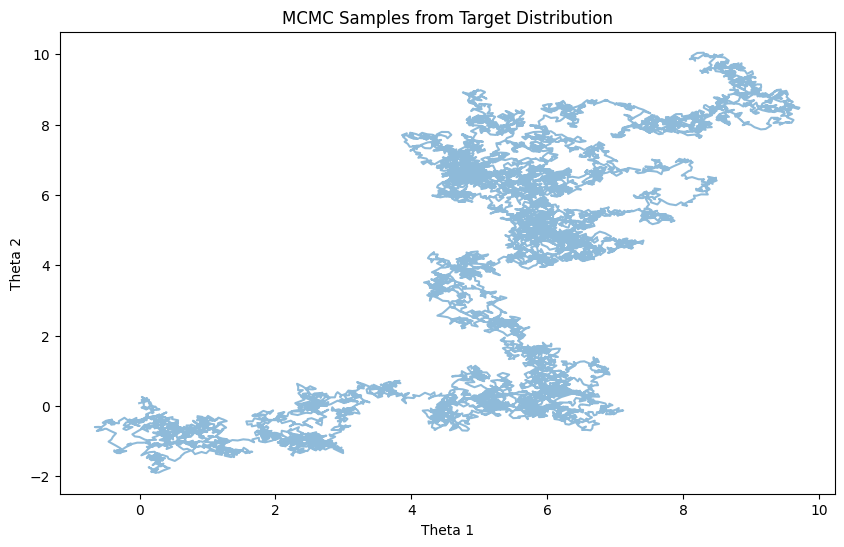

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution: Multivariate Normal with mean mu and covariance matrix Sigma
def target_distribution(theta):
    mu = np.array([0, 0])
    Sigma = np.array([[1.0, 0.5], [0.5, 1.0]])
    det_Sigma = np.linalg.det(Sigma)
    inv_Sigma = np.linalg.inv(Sigma)

    exponent = -0.5 * (theta - mu).dot(inv_Sigma).dot(theta - mu)
    return np.exp(exponent) / np.sqrt(det_Sigma)

def proposal_distribution(current_theta, step_size):
    new_theta = current_theta + np.random.uniform(-step_size, step_size, 2)
    return new_theta

def metropolis_hastings(target, proposal, num_steps=10000, step_size=0.1):
    theta_current = np.array([0.0, 0.0])

    samples = np.zeros((num_steps, 2))

    acceptance_rate = 0.0

    for i in range(num_steps):
        theta_proposed = proposal_distribution(theta_current, step_size)

        # Calculate log probabilities
        log_target_current = target_distribution(theta_current)
        log_target_proposed = target_distribution(theta_proposed)

        # Calculate acceptance ratio
        alpha = np.exp(log_target_proposed - log_target_current)

        # Accept or reject the proposed state
        if np.random.rand() < alpha:
            theta_current = theta_proposed
            acceptance_rate += 1
        samples[i] = theta_current

    print("Acceptance rate:", acceptance_rate / num_steps)

    return samples

samples = metropolis_hastings(target_distribution, proposal_distribution)

plt.figure(figsize=(10, 6))
plt.scatter(samples[:, 0], samples[:, 1], s=5, alpha=0.5)
plt.title('MCMC Samples from Target Distribution')
plt.xlabel('Theta 1')
plt.ylabel('Theta 2')
plt.show()

In [13]:
samples

array([[ 7.72002262e-02, -3.08626318e-02],
       [-4.66224217e-03,  2.15440549e-02],
       [-3.86495028e-02,  7.08123210e-02],
       ...,
       [ 1.37075845e+01,  2.24353955e+01],
       [ 1.37186876e+01,  2.24915277e+01],
       [ 1.36767491e+01,  2.25289567e+01]])